回归是对连续结果的预测，而不是对离散的类标签的预测。
线性回归隐含的思想是用特征的一个线性组合来描述一个目标变量


只有一个特征变量的特例称为简单线性回归（simple linear regression).

如果我们有M个特征值，而不是两个特征值的话，我们可以把方程（3.1）扩展到M个乘积的和
ŷ=sum(w*f)


在N维空间中，这就是一个超平面。如果一个空间是N维的，那么它的超平面有N–1维.
为了让超平面有更多可能,而不是被原点所限制,我们引入了偏置参数
ŷ=sum(w*f)+b  其中w,f,b维度一样


我们有许多评分函数可以用于度量回归模型的性能。最常用的代价函数可能就是均方误差了
n = y.size
MSE  = 1/n*(pow(sum(y-ŷ),2))

此时回归问题就变为了一个优化的问题,任务也变成了通过找到最小代价的权重设置

opencv中的线性回归函数cv2.fitLine

In [21]:
'''写一个线性回归的fitLine'''

'写一个线性回归的fitLine'

1）让我们从生成一些点开始。通过向直线y = 5x + 5上的点添加噪声来生成这些点：

注意

In [22]:
'''导入包'''
import numpy as np
from sklearn import  model_selection
import cv2
import matplotlib.pyplot as plt
%mataplotlib inline
from sklearn import  linear_model
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')


UsageError: Line magic function `%mataplotlib` not found.


In [ ]:
'''添加噪声'''
x = np.linspace(0,10,100)
y = x*5 + np.random.randint(-20,20,100)
y_hat = x*5



In [ ]:
'''可视化这些点'''
plt.plot(x,y_hat,linewidth = 4)
plt.plot(x,y,'x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



3）接下来，我们将这数据些点拆分成训练集和测试集。这里，我们根据70:30的比例拆分数据，70%的数据点用于训练，30%的数据点用于测试：

In [ ]:
x_train,x_test,y_train, y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=42)
x_train.shape,y_train.shape

4）现在，让我们借助cv2.fitLine用一条线拟合这个二维点集。该函数取下列参数：
points：这是一条直线必须拟合的点集。
distType：这是M-估计所使用的距离.
param：这是数值参数（C），用于某些类型的距离。我们将其保持为0，这样就可以选择一个最优值。
reps：这是原点到直线的距离准确率。0.01是reps的一个不错的默认值。
aeps：这是角度的准确率。0.01是aeps的一个不错的默认值.

In [ ]:
distTypeOption = [cv2.DIST_L2,cv2.DIST_L1,
                 cv2.DIST_L12,cv2.DIST_WELSCH,
                 cv2.DIST_HUBER,cv2.DIST_FAIR]
distTypeLabel = ['L2','L1','L12','welsch','huber','fair']
color = ['g','c','m','y','k','b']
points = np.array(list((xi,yi)for xi,yi in zip(x_train,y_train)))
distTypeOption

6）我们还将使用scikit-learn的LinearRegression拟合训练点，然后使用predict函数来预测这些点的y值



reshape(m, -1)   改变维度为m行 2维度 [[1,2,3,4]]
reshape(1,-1)转为行向量
reshape(-1, m)   改变维度为m列 2维度[[1],[2],[3],[4]]
reshape(-1,1) 转为列向量

In [ ]:
from sklearn import  linear_model
linerRegression = linear_model.LinearRegression()
linerRegression.fit(x_train.reshape(1,-1),y_train.reshape(1,-1))
y_sklearn = linerRegression.predict(y_train.reshape(1,-1))
y_sklearn = list(y_sklearn.reshape(1,-1)[0])

ValueError: x and y must have same first dimension, but have shapes (100,) and (70,)

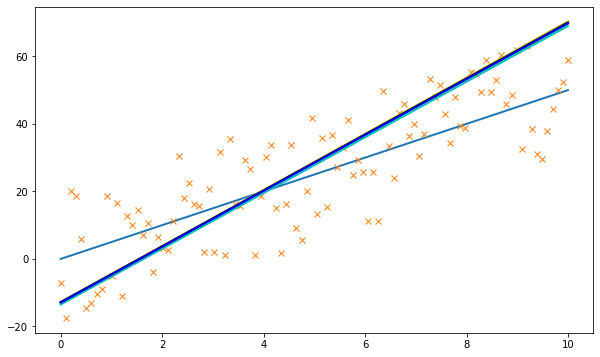

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_hat,linewidth=2,label='Ideal')
plt.plot(x,y,'x',label='Data')

for i in range(0,len(color)):

    distType = distTypeOption[ i]   #[2, 1, 4, 6, 7, 5]

    # distTypeLabel = distTypeLabel[i]
    c = color[i]

    [vxl, vyl, xl, yl] = cv2.fitLine(np.array(points, dtype=np.int32), distType, 0, 0.01, 0.01)
    y_cv = [vyl[0]/vxl[0] * (xi - xl[0]) + yl[0] for xi in x]
    plt.plot(x,y_cv,c=c,linewidth=2)

plt.plot(x,list(y_sklearn),c='0.5', linewidth=2,label='Scikit-Learn API')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')